In [2]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import Levenshtein

In [3]:
#test sequential neural network with 4 layers
model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )

In [4]:
#load dataset and show first rows
path = "C:/Users/Steven/Desktop/Kaggle/Chemistry/"
labels_path = path + "train_labels.csv"
df_train_labels = pd.read_csv(labels_path)
df_train_labels.head()

,image_id,InChI
0,000011a64c74,InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...
1,000019cc0cd2,InChI=1S/C21H30O4/c1-12(22)25-14-6-8-20(2)13(1...
2,0000252b6d2b,InChI=1S/C24H23N5O4/c1-14-13-15(7-8-17(14)28-1...
3,000026b49b7e,InChI=1S/C17H24N2O4S/c1-12(20)18-13(14-7-6-10-...
4,000026fc6c36,InChI=1S/C10H19N3O2S/c1-15-10(14)12-8-4-6-13(7...


In [5]:
#save images in dataframe with columns image_id InChI (international chemical identifier) and the correct local path 
fully_qualified_path = path + "train/{}/{}/{}/{}.png"
convert_image_id_to_path = lambda image_id_details :fully_qualified_path.format(image_id_details[0], image_id_details[1], image_id_details[2], image_id_details) 
df_train_labels['image_path']=df_train_labels['image_id'].apply(convert_image_id_to_path)
df_train_labels.head()

,image_id,InChI,image_path
0,000011a64c74,InChI=1S/C13H20OS/c1-9(2)8-15-13-6-5-10(3)7-12...,C:/Users/Steven/Desktop/Kaggle/Chemistry/train...
1,000019cc0cd2,InChI=1S/C21H30O4/c1-12(22)25-14-6-8-20(2)13(1...,C:/Users/Steven/Desktop/Kaggle/Chemistry/train...
2,0000252b6d2b,InChI=1S/C24H23N5O4/c1-14-13-15(7-8-17(14)28-1...,C:/Users/Steven/Desktop/Kaggle/Chemistry/train...
3,000026b49b7e,InChI=1S/C17H24N2O4S/c1-12(20)18-13(14-7-6-10-...,C:/Users/Steven/Desktop/Kaggle/Chemistry/train...
4,000026fc6c36,InChI=1S/C10H19N3O2S/c1-15-10(14)12-8-4-6-13(7...,C:/Users/Steven/Desktop/Kaggle/Chemistry/train...


In [6]:
#function that shows a couple of images. arguments: image_id's and labels
def visualize_train_batch(image_ids, labels):
    plt.figure(figsize=(16, 12))
    
    for ind, (image_id, label) in enumerate(zip(image_ids, labels)):
        plt.subplot(3, 3, ind + 1)
        image = cv2.imread(convert_image_id_to_path(image_id))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image)
#         plt.xlim(0, 500)
#         plt.ylim(0, 500)
        plt.title(f"{label[:30]}...", fontsize=10)
    
    plt.show()

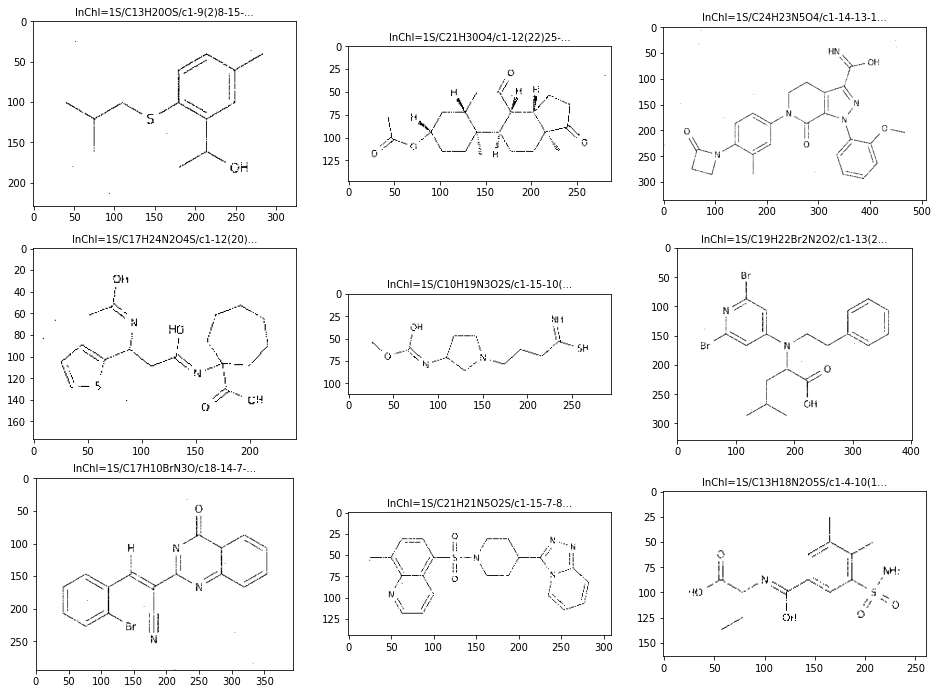

In [13]:
#select part of the pictures
tmp_df = df_train_labels[0:9]
#select image_id's and InChI's
image_ids = tmp_df['image_id']
labels = tmp_df["InChI"].values
visualize_train_batch(image_ids, labels)

In [14]:
#to get score based on true and predicted values of atoms
def get_score(y_true, y_pred):
    scores = []
    for true, pred in zip(y_true, y_pred):
        score = Levenshtein.distance(true, pred)
        scores.append(score)
    avg_score = np.mean(scores)
    return avg_score

In [15]:
#make an array of the amount of atoms for all pictures
atoms = np.array(['C', 'H', 'B', 'Br', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S', 'Si'])
atom_list = np.zeros((len(df_train_labels), len(atoms)))
counter = 0
for i in df_train_labels['InChI']:
    molecule = i.split('/c')[0].split('1S/')[1]
    for j in range(len(molecule)):
        if molecule[j] in atoms:
            loc = np.where(atoms == molecule[j])[0][0]
            atom_number = []
        elif molecule[j] == 'r':
            loc = 3
        elif molecule[j] == 'l':
            loc = 4
        elif molecule[j] == 'i':
            loc = 11
        else:
            atom_number += molecule[j]
        
        if molecule[j] == molecule[-1]:
            if atom_number == []:
                atom_number = ['1']
            atom_list[counter][loc] = "". join(atom_number)
        elif molecule[j + 1] in atoms:
            if atom_number == []:
                atom_number = ['1']
            atom_list[counter][loc] = "". join(atom_number)
    counter += 1
    if counter == 20:
        print(atom_list)
        break

[[13. 20.  0. ...  0.  1.  0.]
 [21. 30.  0. ...  0.  0.  0.]
 [24. 23.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
